### Developer Survey 2020 Explore

Now you have had a closer look at the data, and you saw how I approached looking at how the survey respondents think you should break into the field.  Let's recreate those results, as well as take a look at another question.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public2020.csv')
schema = pd.read_csv('./survey_results_schema2020.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


#### Question 1

**1.** In order to understand how to break into the field, we will look at the **CousinEducation** field.  Use the **schema** dataset to answer this question.  Write a function called **get_description** that takes the **schema dataframe** and the **column** as a string, and returns a string of the description for that column.

In [6]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Randomized respondent ID number (not in order of survey response time)'

The question we have been focused on has been around how to break into the field.  Use your **get_description** function below to take a closer look at the **CousinEducation** column.

In [8]:
get_description('Age1stCode')

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

#### Question 2

**2.** Provide a pandas series of the different **CousinEducation** status values in the dataset.  Store this pandas series in **cous_ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.  If it looks terrible, and you get no information from it, then you followed directions.  However, we should clean this up!

In [7]:
cous_ed_vals = df.CousinEducation.value_counts()#Provide a pandas series of the counts for each CousinEducation status

cous_ed_vals # assure this looks right

Take online courses; Buy books and work through the exercises                                                                          192
None of these                                                                                                                          167
Take online courses                                                                                                                    158
Take online courses; Part-time/evening courses; Buy books and work through the exercises                                               140
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises                                     132
Take online courses; Contribute to open source; Buy books and work through the exercises                                               129
Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises                            121
Take online courses; Contri

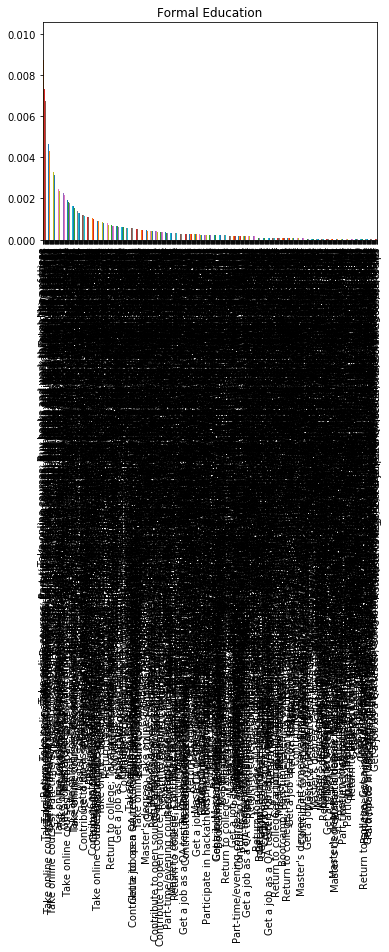

In [10]:
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(cous_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

We definitely need to clean this.  Above is an example of what happens when you do not clean your data. Below I am using the same code you saw in the earlier video to take a look at the data after it has been cleaned.

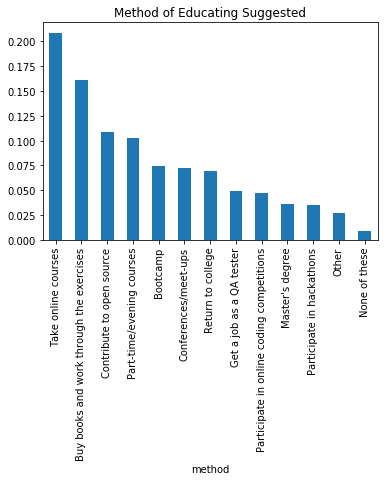

In [11]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

#### Question 4

**4.** I wonder if some of the individuals might have bias towards their own degrees.  Complete the function below that will apply to the elements of the **FormalEducation** column in **df**. 

In [12]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Professional degree"):
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [13]:
# Check your code here
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
t.higher_ed_test(higher_ed_perc)

Nice job!  That's right.  The percentage of individuals in these three groups is 0.2302376714480159.


#### Question 5

**5.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, you have already created the **HigherEd** column using the check code portion above, so here you only need to subset the dataframe using this newly created column.

In [14]:
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [15]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.205361,0.21009,-0.00472961
Buy books and work through the exercises,0.163579,0.160257,0.00332183
Contribute to open source,0.106031,0.110053,-0.00402243
Part-time/evening courses,0.101498,0.103005,-0.00150699
Bootcamp,0.0731179,0.0740695,-0.000951639
Return to college,0.0691762,0.0691233,5.29081e-05
Conferences/meet-ups,0.0670083,0.0740695,-0.00706122
Master's degree,0.0557745,0.0302337,0.0255408
Get a job as a QA tester,0.0508475,0.0481019,0.00274557


#### Question 6

**6.** What can you conclude from the above plot?  Change the dictionary to mark **True** for the keys of any statements you can conclude, and **False** for any of the statements you cannot conclude.

In [ ]:
sol = {'Everyone should get a higher level of formal education': False, 
       'Regardless of formal education, online courses are the top suggested form of education': True,
       'There is less than a 1% difference between suggestions of the two groups for all forms of education': False,
       'Those with higher formal education suggest it more than those who do not have it': True}

t.conclusions(sol)

This concludes another look at the way we could compare education methods by those currently writing code in industry.